# Python for Finance
#### Using pandas to read and clean data

In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style 

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2018,10,25)

df = web.DataReader('JD','yahoo', start, end)
print(df.tail(10))

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2018-10-15  24.639999  23.799999  24.110001  24.139999  11138200  24.139999
2018-10-16  24.700001  24.080000  24.500000  24.629999  11689500  24.629999
2018-10-17  24.610001  23.459999  24.520000  23.680000  15378700  23.680000
2018-10-18  24.132000  23.219999  23.500000  23.330000  15582300  23.330000
2018-10-19  23.950001  22.950001  23.940001  23.010000  12970000  23.010000
2018-10-22  24.110001  23.299999  23.860001  23.540001  13939900  23.540001
2018-10-23  23.590000  22.330000  22.610001  23.230000  17949600  23.230000
2018-10-24  23.200001  21.690001  23.180000  21.760000  22822200  21.760000
2018-10-25  22.590000  21.910000  22.049999  22.559999  13330200  22.559999
2018-10-26  22.930000  21.580000  21.670000  22.580000  18082700  22.580000


In [6]:
df.to_csv('JD.csv')
df = pd.read_csv('JD.csv')
print(df.head(10))

   Unnamed: 0        Date       Open       High        Low      Close  \
0           0  2014-05-22  21.750000  22.799999  20.240000  20.900000   
1           1  2014-05-23  21.250000  21.250000  19.940001  20.100000   
2           2  2014-05-27  20.280001  22.980000  20.250000  22.969999   
3           3  2014-05-28  22.980000  25.299999  22.799999  24.780001   
4           4  2014-05-29  25.040001  25.690001  24.240000  25.400000   
5           5  2014-05-30  25.270000  25.559999  23.790001  25.000000   
6           6  2014-06-02  25.400000  25.440001  24.070000  24.600000   
7           7  2014-06-03  24.170000  25.250000  24.030001  25.100000   
8           8  2014-06-04  24.990000  25.280001  24.440001  24.540001   
9           9  2014-06-05  24.799999  26.750000  24.600000  25.780001   

   Adj Close    Volume  
0  20.900000  84449700  
1  20.100000  20890300  
2  22.969999  15338100  
3  24.780001  16783000  
4  25.400000   8525900  
5  25.000000   6302800  
6  24.600000   380880

In [33]:
df = pd.read_csv('JD.csv', parse_dates=True, index_col=1)
del df['Unnamed: 0']
print(df.head(10))
#Date is a datetime index

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-05-22  21.750000  22.799999  20.240000  20.900000  20.900000  84449700
2014-05-23  21.250000  21.250000  19.940001  20.100000  20.100000  20890300
2014-05-27  20.280001  22.980000  20.250000  22.969999  22.969999  15338100
2014-05-28  22.980000  25.299999  22.799999  24.780001  24.780001  16783000
2014-05-29  25.040001  25.690001  24.240000  25.400000  25.400000   8525900
2014-05-30  25.270000  25.559999  23.790001  25.000000  25.000000   6302800
2014-06-02  25.400000  25.440001  24.070000  24.600000  24.600000   3808800
2014-06-03  24.170000  25.250000  24.030001  25.100000  25.100000   3388500
2014-06-04  24.990000  25.280001  24.440001  24.540001  24.540001   2990800
2014-06-05  24.799999  26.750000  24.600000  25.780001  25.780001   7933500


#### Using matplotlib to plot graphs

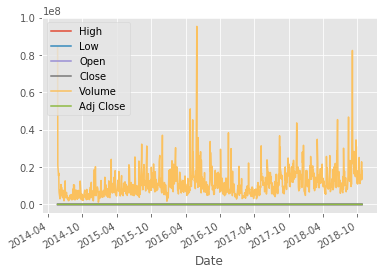

In [3]:
style.use('ggplot')
df.plot()
plt.show()

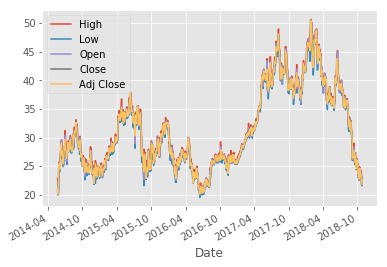

In [4]:
price_df = df.drop('Volume', axis=1)
price_df.plot()
plt.show()

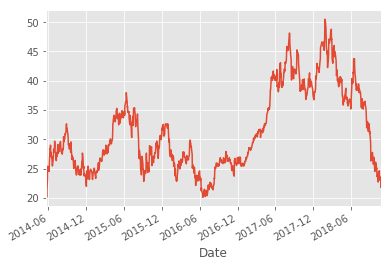

In [36]:
price_df['Adj Close'].plot()
plt.show()

In [5]:
price_df['100MA'] = price_df['Adj Close'].rolling(window=100).mean()
price_df['30MA'] = price_df['Adj Close'].rolling(window=30).mean()
#price_df.dropna(inplace=True)
price_df

,High,Low,Open,Close,Adj Close,100MA,30MA
Date,,,,,,,
2014-05-22,22.799999,20.240000,21.750000,20.900000,20.900000,NaN,NaN
2014-05-23,21.250000,19.940001,21.250000,20.100000,20.100000,NaN,NaN
2014-05-27,22.980000,20.250000,20.280001,22.969999,22.969999,NaN,NaN
2014-05-28,25.299999,22.799999,22.980000,24.780001,24.780001,NaN,NaN
2014-05-29,25.690001,24.240000,25.040001,25.400000,25.400000,NaN,NaN
2014-05-30,25.559999,23.790001,25.270000,25.000000,25.000000,NaN,NaN
2014-06-02,25.440001,24.070000,25.400000,24.600000,24.600000,NaN,NaN
2014-06-03,25.250000,24.030001,24.170000,25.100000,25.100000,NaN,NaN
2014-06-04,25.280001,24.440001,24.990000,24.540001,24.540001,NaN,NaN


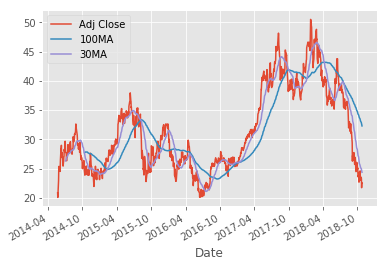

In [6]:
price_df[['Adj Close','100MA','30MA']].plot()
plt.show()

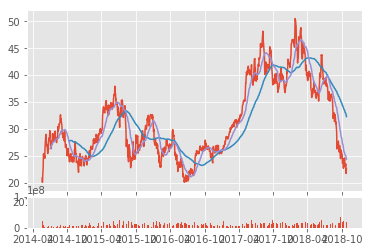

In [7]:
# putting up the shape of the plot
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)

# what content to plot on the two sub graphs(x, y)
ax1.plot(price_df.index, price_df['Adj Close'])
ax1.plot(price_df.index, price_df[['100MA','30MA']])
ax2.bar(df.index, df['Volume'])
plt.show()

#### Resampling the data and ploting candle graph with ohlc and moving averages

In [23]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

# resample price data into weekly data
# in situation like stock split, we can only use this way to get the accurate ohlc data.
df_ohlc = df['Adj Close'].resample('7D').ohlc()
df_30ma = price_df['30MA'].resample('7D').mean()
df_100ma = price_df['100MA'].resample('7D').mean()
df_volume = df['Volume'].resample('7D').sum()

print(df_ohlc.head())
print(df_volume.head())
print(df_30ma.tail())
print(df_100ma.tail())

                 open       high        low      close
Date                                                  
2014-05-22  20.900000  24.780001  20.100000  24.780001
2014-05-29  25.400000  25.400000  24.540001  24.540001
2014-06-05  25.780001  29.000000  25.780001  29.000000
2014-06-12  27.170000  27.790001  26.520000  26.520000
2014-06-19  25.830000  27.070000  25.450001  27.070000
Date
2014-05-22    137461100
2014-05-29     25016800
2014-06-05     35083600
2014-06-12     29411700
2014-06-19     24582500
Name: Volume, dtype: int64
Date
2018-09-27    28.275333
2018-10-04    26.973067
2018-10-11    25.709667
2018-10-18    25.018533
2018-10-25    24.469833
Name: 30MA, dtype: float64
Date
2018-09-27    34.81078
2018-10-04    34.19784
2018-10-11    33.57218
2018-10-18    32.93170
2018-10-25    32.39900
Name: 100MA, dtype: float64


In [24]:
# need to map Dates to mdates in matplotlib

# move Date from index to column
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,Date,open,high,low,close
0,2014-05-22,20.900000,24.780001,20.100000,24.780001
1,2014-05-29,25.400000,25.400000,24.540001,24.540001
2,2014-06-05,25.780001,29.000000,25.780001,29.000000
3,2014-06-12,27.170000,27.790001,26.520000,26.520000
4,2014-06-19,25.830000,27.070000,25.450001,27.070000


In [25]:
# matplotlib will formulate mdates into years
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,735375.0,20.900000,24.780001,20.100000,24.780001
1,735382.0,25.400000,25.400000,24.540001,24.540001
2,735389.0,25.780001,29.000000,25.780001,29.000000
3,735396.0,27.170000,27.790001,26.520000,26.520000
4,735403.0,25.830000,27.070000,25.450001,27.070000


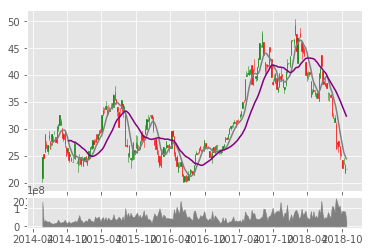

In [41]:
# putting up the shape of the plot
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)
# display beautiful date using mdates
ax1.xaxis_date()

# what content to plot on the two sub graphs(x, y)
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax1.plot(df_30ma.index.map(mdates.date2num), df_30ma, color='grey')
ax1.plot(df_100ma.index.map(mdates.date2num), df_100ma, color='purple')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0, color='grey')

plt.show()

#### data scraping using bs4

In [63]:
from bs4 import BeautifulSoup
import pickle
import requests
import json

tickers = []

* *getting all S&P 500 stock tickers using BeautifulSoup*

In [67]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    html = resp.text
    soup = BeautifulSoup(html, 'lxml')
    # print(soup.prettify())
    # find the first table tag with class wikitable sortable
    table = soup.find('table',{'class':'wikitable sortable'})
    global tickers
    # find the first td(table data) cell in a list of tr excluding the columns headings
    for line in table.findAll('tr')[1:]:
        ticker = line.find('td').text.replace('.','-')
        print(ticker, end=' ')
        tickers.append(ticker)
    # dump the entire list into a pickle file
    with open('sp500.pickle', 'wb') as file:
        pickle.dump(tickers, file)
        
save_sp500_tickers()

MMM ABT ABBV ABMD ACN ATVI ADBE AMD AAP AES AET AMG AFL A APD AKAM ALK ALB ARE ALXN ALGN ALLE AGN ADS LNT ALL GOOGL GOOG MO AMZN AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH APC ADI ANSS ANTM AON AOS APA AIV AAPL AMAT APTV ADM ARNC ANET AJG AIZ T ADSK ADP AZO AVB AVY BHGE BLL BAC BK BAX BBT BDX BRK-B BBY BIIB BLK HRB BA BKNG BWA BXP BSX BHF BMY AVGO BR BF-B CHRW CA COG CDNS CPB COF CAH KMX CCL CAT CBOE CBRE CBS CELG CNC CNP CTL CERN CF SCHW CHTR CVX CMG CB CHD CI XEC CINF CTAS CSCO C CFG CTXS CLX CME CMS KO CTSH CL CMCSA CMA CAG CXO COP ED STZ COO CPRT GLW COST COTY CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DLR DFS DISCA DISCK DISH DG DLTR D DOV DWDP DTE DRE DUK DXC ETFC EMN ETN EBAY ECL EIX EW EA EMR ETR EOG EQT EFX EQIX EQR ESS EL EVRG ES RE EXC EXPE EXPD ESRX EXR XOM FFIV FB FAST FRT FDX FIS FITB FE FISV FLT FLIR FLS FLR FMC FL F FTNT FTV FBHS BEN FCX GPS GRMN IT GD GE GIS GM GPC GILD GPN GS GT GWW HAL HBI HOG HRS HIG HAS HCA HCP HP HSIC HSY HES HPE HLT HFC HOLX HD HON HRL